# Example of forecast verification for a continuous variable with a forecast probability density function: the Continuous Rank Probability Score (CRPS)

In [1]:
# Imports
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm

In [28]:
# Dummy variable for the random variable
dx = 0.01
# Support
xmin, xmax = 6, 10
x = np.arange(6, 10, dx)

print(np.std([8.1, 8.5, 8.2, 8.55, 8.3, 8.2]))

0.16435902436096722


In [29]:
                    # Name         # Forecast PDF
dataForecasts =  {  "Louis":        norm.pdf(x, loc = 8.1, scale = 0.05)     ,
                    "Camille":      norm.pdf(x, loc = 8.5, scale = 0.2),     
                    "Juliette":     ((x > 8.1) * (x <= 8.3)) * np.ones(len(x)) * 5  , 
                    "Lucas":        ((x > 8.4) * (x <= 8.7)) * np.ones(len(x)) * 10/3   ,
                    "Auriane":        norm.pdf(x, loc = 8.3, scale = 0.15)   ,
                    "Justin":        norm.pdf(x, loc = 8.2, scale = 0.2)   ,
                    "Groupe (meth A)":        ((x > 8.1) * (x <= 8.55)) * np.ones(len(x)) * (1 / 0.45)  ,
                    "Groupe (meth B)":    norm.pdf(x, loc = 8.308, scale = 0.164)   ,
                 }

nForecasts    = len(dataForecasts)

Louis
Camille
Juliette
Lucas
Auriane
Justin
Groupe (meth A)
Groupe (meth B)


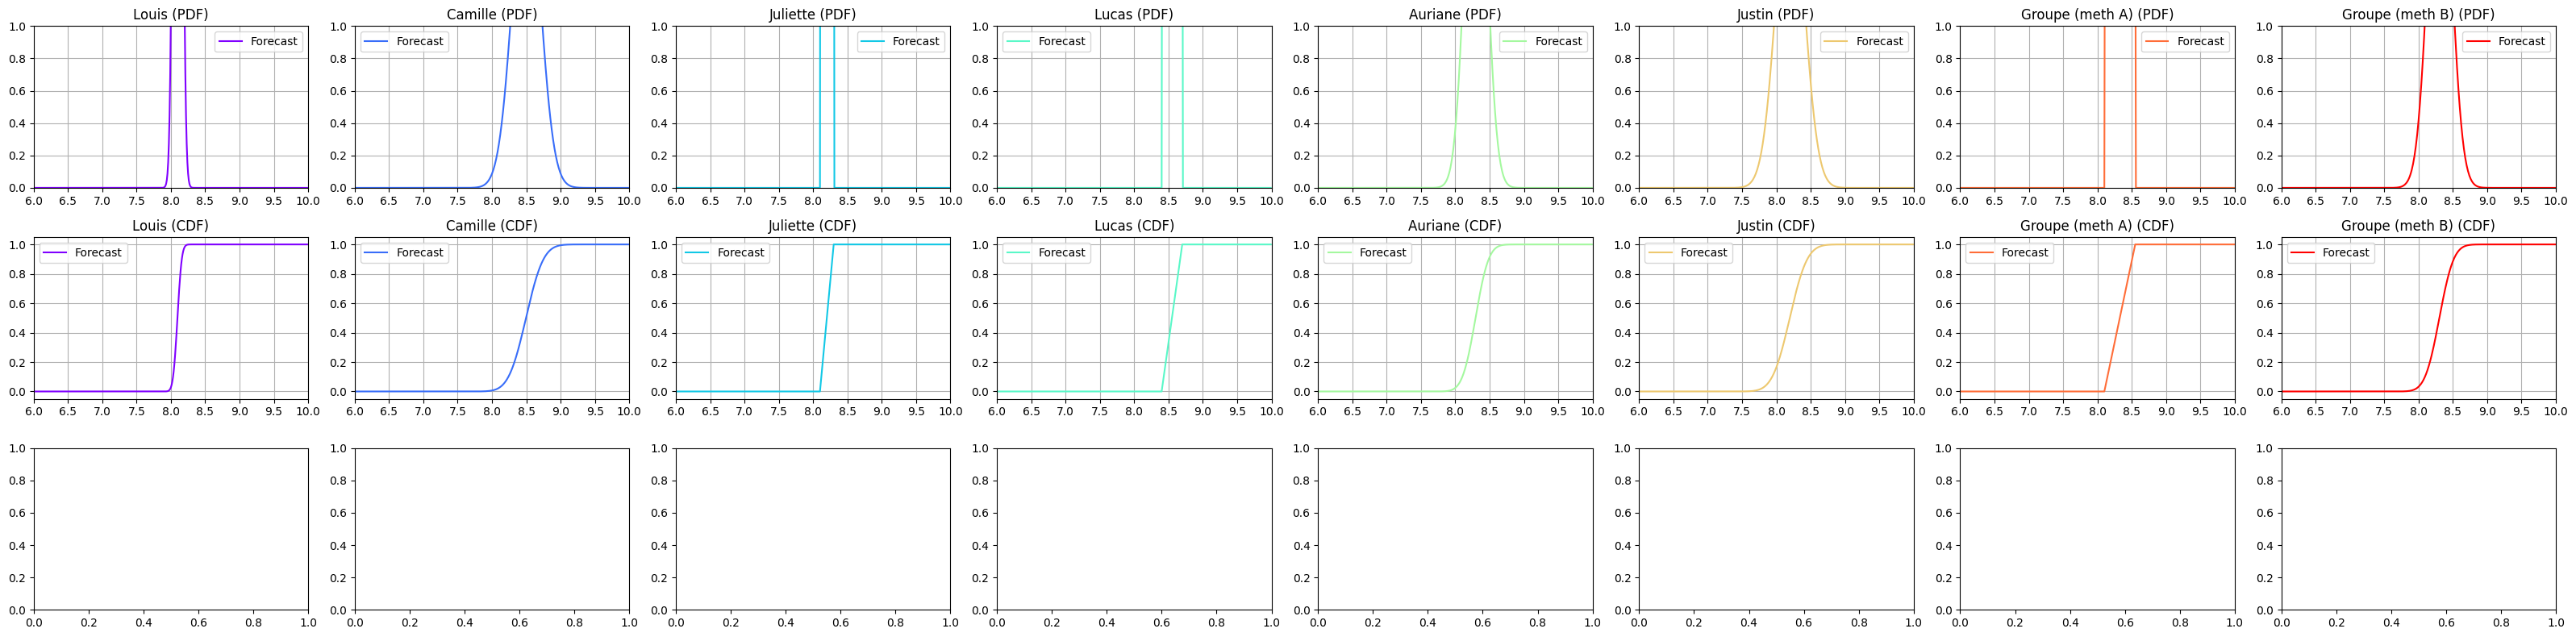

In [31]:
# Draw the PDFs
fig, ax = plt.subplots(3, nForecasts, figsize = (nForecasts * 4, 8))
color = plt.cm.rainbow(np.linspace(0, 1, nForecasts))

for jForecast, d in enumerate(dataForecasts):

    # Top row: PDFs
    thisAx = ax[0, jForecast]
    print(d)
    thisPDF = dataForecasts.get(d)
    thisAx.plot(x, thisPDF, color = color[jForecast], label = "Forecast")

    thisAx.grid()
    thisAx.set_ylim(0, 1.0)
    thisAx.set_xlim(xmin, xmax)
    thisAx.set_title(d + " (PDF)")
    thisAx.legend()


    # Bottom row : CDFs
    thisAx = ax[1, jForecast]
    thisCDF= np.cumsum(thisPDF) * dx
    thisAx.plot(x, thisCDF, color = color[jForecast], label = "Forecast")
    thisAx.set_xlim(xmin, xmax)

    thisAx.set_title(d + " (CDF)")
    thisAx.grid()
    thisAx.legend()


fig.tight_layout()
#fig.savefig("fig.png", dpi = 300)

In [32]:
# Enter verification value
verification = 8.104866089
verificationCDF = np.ones(len(x)) * (x >= verification)  

# Continuous rank probability score
$CRPS = \int_{-\infty}^{+\infty} \left(F(x) - H(x-o)\right)^2\textrm{d}x $

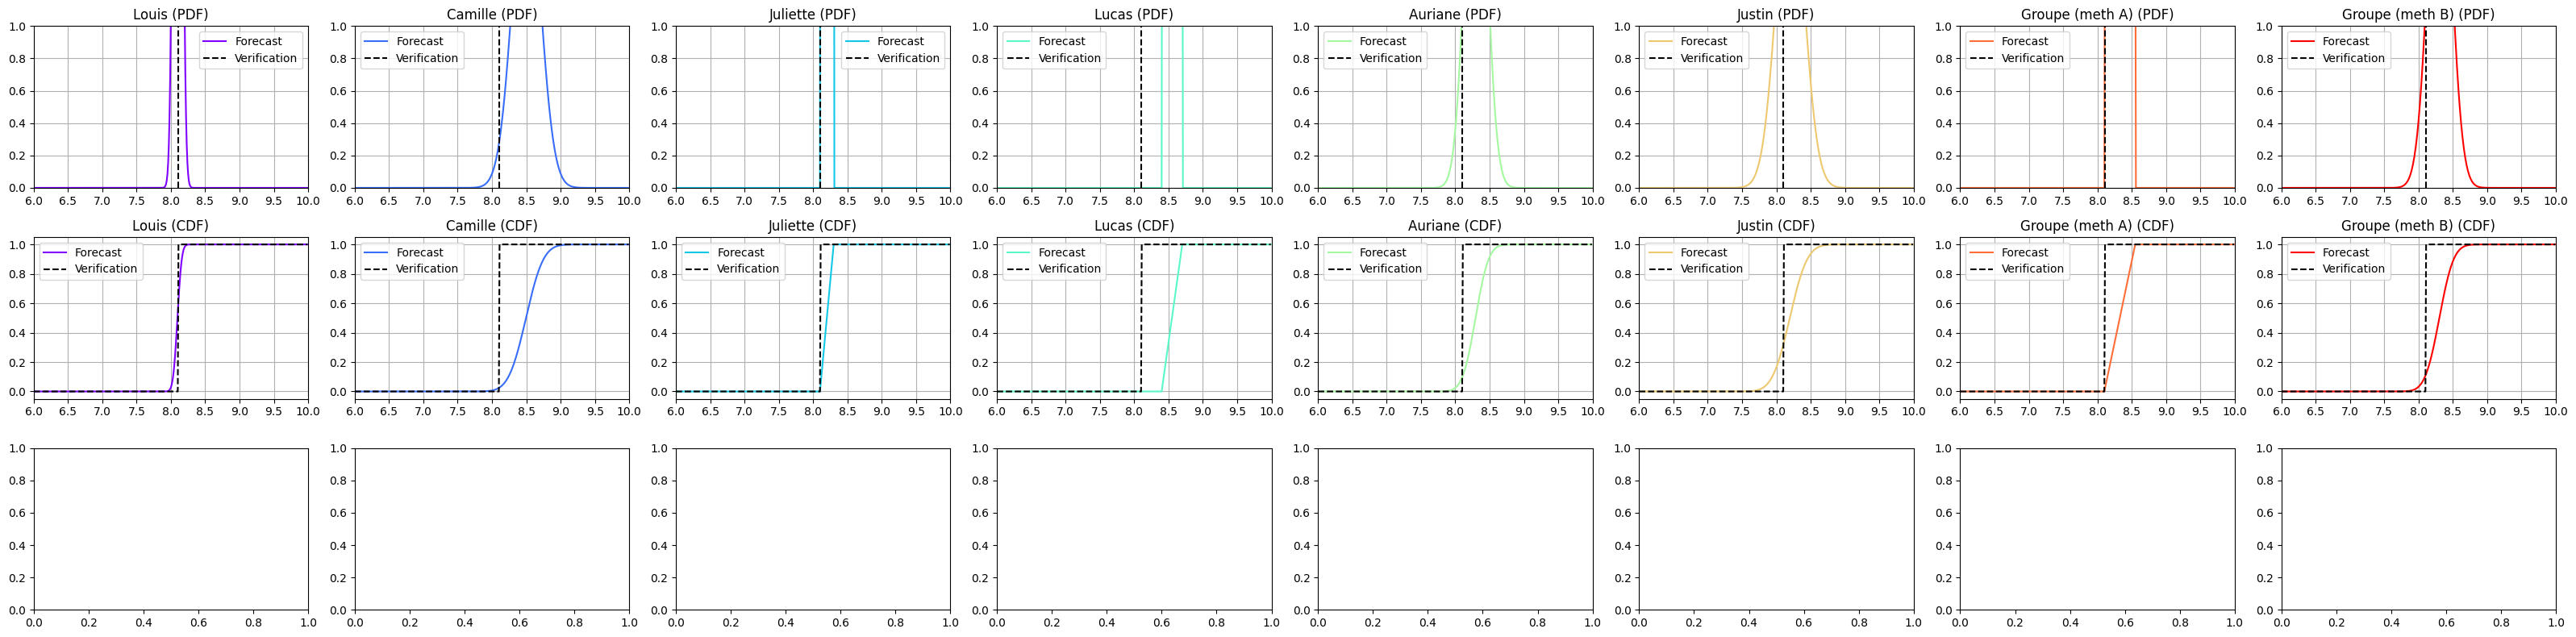

In [33]:
# Add the Heaviside function to the plots
plt.figure(fig)
for jForecast, d in enumerate(dataForecasts):

    # Top row: PDFs
    thisAx = ax[0, jForecast]
    thisAx.plot((verification, verification), (0, 1e9), color = "black", linestyle = "--", label = "Verification")

    thisAx.set_ylim(0, 1.0)
    thisAx.set_xlim(xmin, xmax)
    thisAx.legend()


    # Bottom row : CDFs
    thisAx = ax[1, jForecast]
    thisAx.plot(x, verificationCDF, color = "black", linestyle = "--", label = "Verification")
    thisAx.set_xlim(xmin, xmax)
    thisAx.legend()

    #thisAx.set_title(d + " (CDF)")

plt.show(fig)

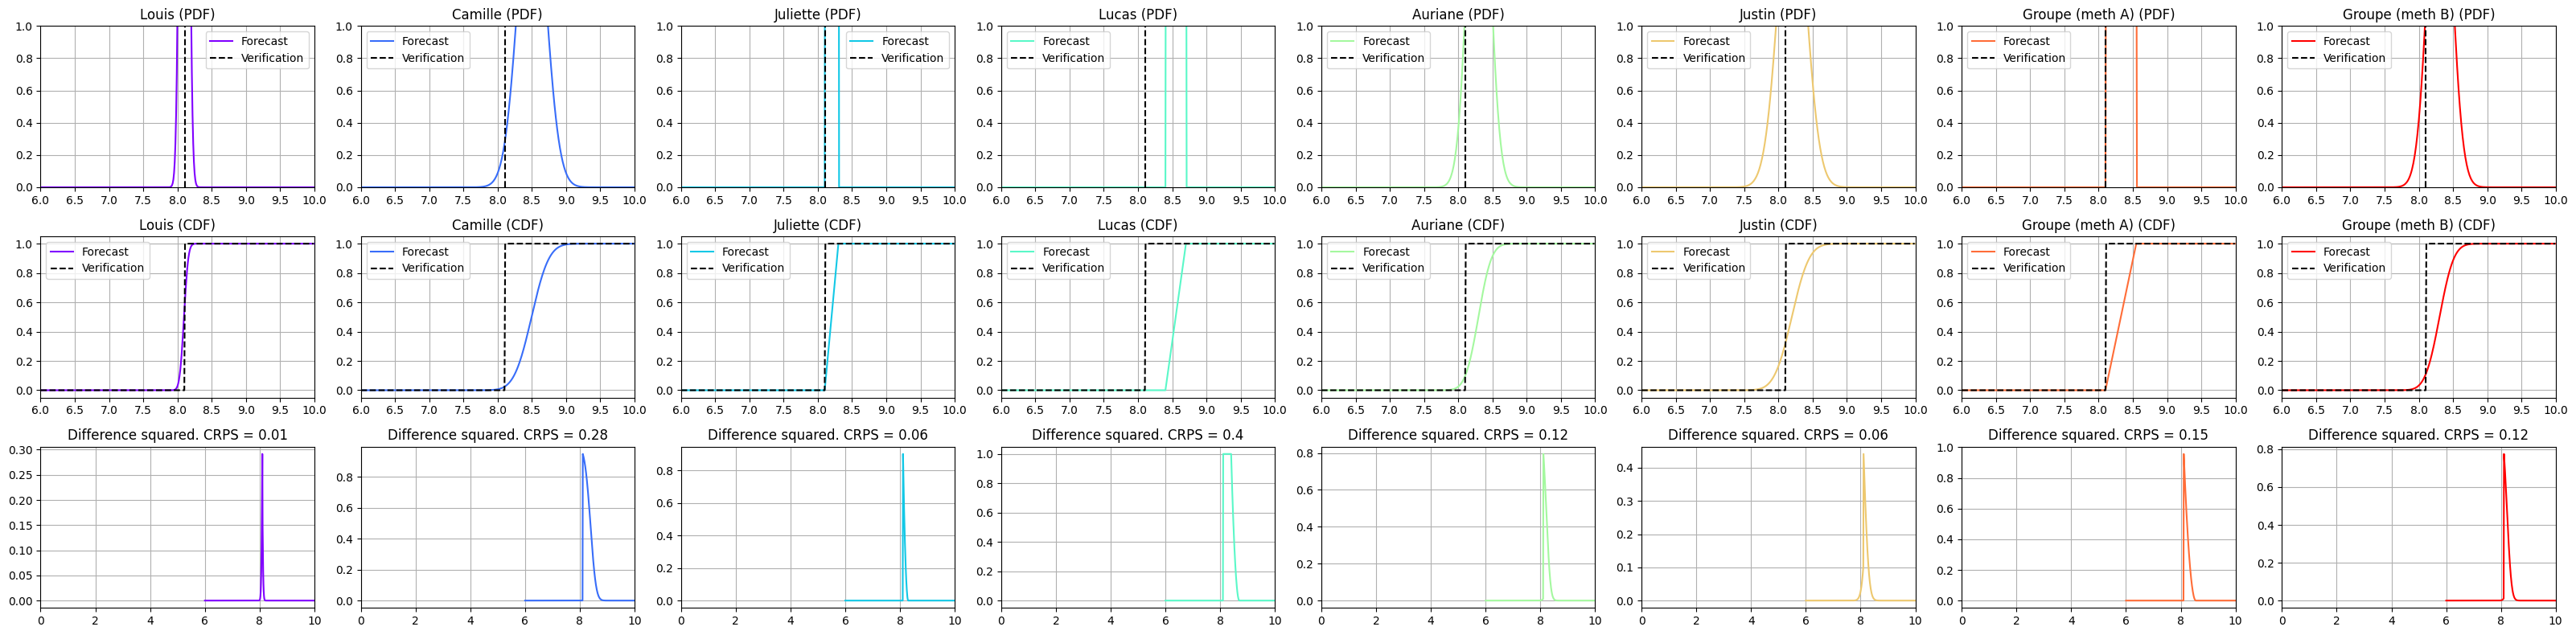

In [34]:
# Plot difference squared
plt.figure(fig)
for jForecast, d in enumerate(dataForecasts):
    thisAx = ax[2, jForecast]
    thisPDF = dataForecasts.get(d)    
    thisCDF= np.cumsum(thisPDF) * dx

    thisAx.plot(x, (thisCDF - verificationCDF) ** 2, color = color[jForecast])
    thisAx.set_xlim(xmin, xmax)
    thisAx.set_title("Difference squared")
    thisAx.grid()

    thisCRPS = np.sum(dx * (thisCDF - verificationCDF) ** 2 )

    thisAx.set_title("Difference squared. CRPS = " + str(np.round(thisCRPS, 2)))
  
plt.show(fig)